In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


import copy
import cv2
from PIL import Image

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # 메모리 증가 설정
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)  # 메모리 설정은 프로그램 시작 전에 설정해야 합니다.
else:
    print("No GPU available")


1 Physical GPUs, 1 Logical GPUs


START

"0" 클래스는 [1, 0, 0]으로 인코딩

"1" 클래스는 [0, 1, 0]으로 인코딩

"2" 클래스는 [0, 0, 1]으로 인코딩

Train

In [3]:
import tensorflow as tf
import os
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
batch_size = 32

# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/train"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
dataset = dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
dataset = dataset.shuffle(buffer_size=len(file_paths))
dataset = dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


In [ ]:
# import matplotlib.pyplot as plt

# # 데이터셋에서 하나의 배치를 가져오기
# for image_batch, label_batch in dataset.take(1):
#     # 이미지와 라벨 출력
#     for image, label in zip(image_batch, label_batch):
#         # 이미지 시각화
#         plt.figure()
#         plt.imshow(image.numpy())
#         plt.title(f"Label: {label.numpy()}")
#         plt.axis("off")
#         plt.show()

Validation

In [4]:
# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/validation"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
val_dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
val_dataset = val_dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
val_dataset = val_dataset.shuffle(buffer_size=len(file_paths))
val_dataset = val_dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in val_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


In [ ]:
# import matplotlib.pyplot as plt

# # 데이터셋에서 하나의 배치를 가져오기
# for image_batch, label_batch in val_dataset.take(1):
#     # 이미지와 라벨 출력
#     for image, label in zip(image_batch, label_batch):
#         # 이미지 시각화
#         plt.figure()
#         plt.imshow(image.numpy())
#         plt.title(f"Label: {label.numpy()}")
#         plt.axis("off")
#         plt.show()

Test

In [5]:
import tensorflow as tf
import os
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
batch_size = 32

# 이미지 파일을 읽고 레이블을 설정하는 함수
def load_and_preprocess_image(image_path, label):
    # 이미지 읽기
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    # 이미지 크기 조정 및 정규화
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0  # 이미지를 [0,1] 범위로 정규화
    return img, label

# 데이터 디렉토리 경로 설정
data_dir = "C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/test"

# 클래스 레이블 설정
class_names = ["0", "1", "2"]

# 이미지 파일 경로와 레이블을 리스트에 저장
file_paths = []
labels = []

# 클래스 레이블에 따라 이미지 파일 경로 및 레이블 설정
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(i)  # 클래스 레이블 설정

# 클래스 수 계산
num_classes = len(class_names)

# 원-핫 인코딩 수행
labels_onehot = tf.one_hot(labels, num_classes)

# 데이터셋 생성
image_paths_ds = tf.data.Dataset.from_tensor_slices(file_paths)
labels_ds = tf.data.Dataset.from_tensor_slices(labels_onehot)

# 이미지 파일 경로와 레이블을 결합하여 데이터셋 생성
test_dataset = tf.data.Dataset.zip((image_paths_ds, labels_ds))

# 이미지를 읽고 전처리하는 함수 적용
test_dataset = test_dataset.map(load_and_preprocess_image)

# 데이터셋을 셔플 및 배치 설정
test_dataset = test_dataset.shuffle(buffer_size=len(file_paths))
test_dataset = test_dataset.batch(batch_size)

# 데이터셋 사용 예시
for image_batch, label_batch in test_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

Image batch shape: (32, 112, 112, 3)
Label batch shape: (32, 3)


In [ ]:
# import matplotlib.pyplot as plt

# # 데이터셋에서 하나의 배치를 가져오기
# for image_batch, label_batch in test_dataset.take(1):
#     # 이미지와 라벨 출력
#     for image, label in zip(image_batch, label_batch):
#         # 이미지 시각화
#         plt.figure()
#         plt.imshow(image.numpy())
#         plt.title(f"Label: {label.numpy()}")
#         plt.axis("off")
#         plt.show()

## MODEL - CAM, Grad-CAM

# RESNET-18

In [6]:
def residual_block(x, filters, kernel_size=3, stride=1):
    x_shortcut = x
    x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Shortcut path => x가 바로 이동
    if stride != 1 or x.shape[-1] != filters:
        x_shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x_shortcut)
        x_shortcut = tf.keras.layers.BatchNormalization()(x_shortcut)

    # Add the shortcut to the main path => shortcut경로와 주 경로 결합
    x = tf.keras.layers.Add()([x, x_shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [11]:
def build_resnet18(input_shape=(112, 112, 3), num_classes=3):
    input_layer = tf.keras.layers.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(input_layer)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    x = residual_block(x, filters=64, stride=1)
    x = residual_block(x, filters=64, stride=1)

    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128, stride=1)

    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256, stride=1)

    x = residual_block(x, filters=512, stride=2)
    x = residual_block(x, filters=512, stride=1)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # 분류를 위한 Fully Connected Layer
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    # 모델 생성
    model = tf.keras.models.Model(inputs=input_layer, outputs=x)

    return model

In [12]:
model_with_cam = build_resnet18()
model_with_cam.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 56, 56, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_20 (BatchN  (None, 56, 56, 64)  256         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [13]:
with tf.device('/GPU:0'):
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    model_with_cam.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
        loss='categorical_crossentropy',
        metrics=METRICS
    )

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/not_pretrained_best_model_again.h5',  # 가중치를 저장할 파일 경로
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

with tf.device('/GPU:0'):
  history_cam_model = model_with_cam.fit(
      dataset,
      epochs=100,
      validation_data=val_dataset,
      verbose=1,
      use_multiprocessing=True,
      callbacks=[checkpoint_callback]
)

Epoch 1/100


338/338 [==============================] - ETA: 0s - loss: 0.5273 - accuracy: 0.7467 - precision: 0.7515 - recall: 0.7416
Epoch 1: val_accuracy improved from -inf to 0.36083, saving model to C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행\not_pretrained_best_model_again.h5
338/338 [==============================] - 80s 112ms/step - loss: 0.5273 - accuracy: 0.7467 - precision: 0.7515 - recall: 0.7416 - val_loss: 1.5030 - val_accuracy: 0.3608 - val_precision: 0.3606 - val_recall: 0.3592
Epoch 2/100
337/338 [============================>.] - ETA: 0s - loss: 0.3908 - accuracy: 0.8182 - precision: 0.8201 - recall: 0.8146
Epoch 2: val_accuracy improved from 0.36083 to 0.70917, saving model to C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행\not_pretrained_best_model_again.h5
338/338 [==============================] - 46s 82ms/step - loss: 0.3909 - accuracy: 0.8181 - precision: 0.8200 - recall: 0.8145 - val_loss: 0.6607 - val_accuracy: 0.7092 - val_precision: 0.71

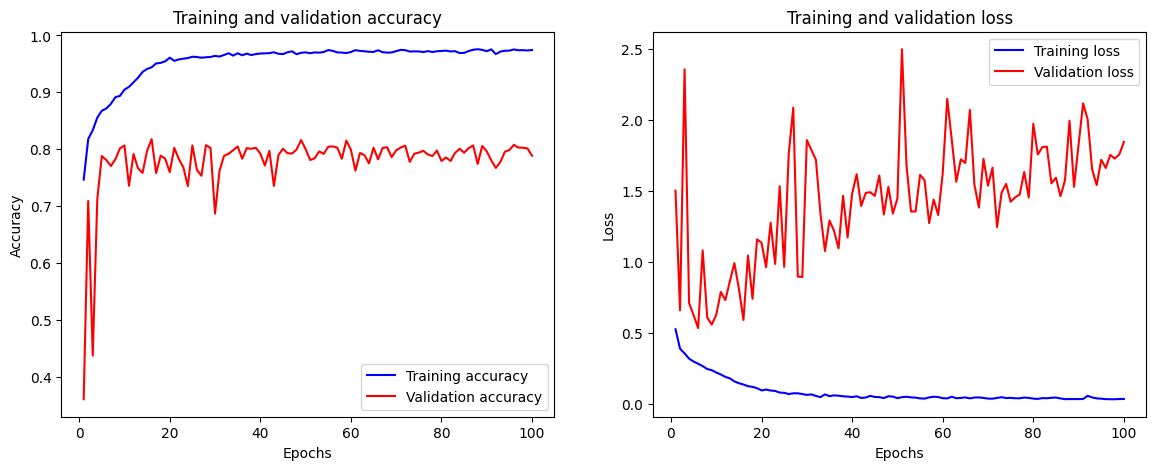

In [19]:
import matplotlib.pyplot as plt

# 훈련 과정 시각화
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# 훈련 후 호출
plot_training_history(history_cam_model)


In [15]:
# import tensorflow as tf
# from tensorflow.keras.callbacks import ModelCheckpoint

# # 1단계: 저장된 모델 불러오기
# loaded_model = tf.keras.models.load_model('C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/not_pretrained_best_model_again.h5')

# # 2단계: 콜백 정의
# checkpoint_callback = ModelCheckpoint(
#     filepath='C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/not_pretrained_best_model_again2.h5',  # 추가 학습 후 가중치를 저장할 파일 경로
#     monitor='val_accuracy',
#     save_best_only=True,
#     save_weights_only=False,
#     verbose=1
# )

# # 3단계: 추가 학습 진행
# with tf.device('/GPU:0'):
#     history_cam_model = loaded_model.fit(
#         dataset,  # 훈련 데이터
#         epochs=100,  # 추가 학습할 에폭 수
#         validation_data=val_dataset,  # 검증 데이터
#         verbose=1,
#         use_multiprocessing=True,
#         callbacks=[checkpoint_callback]
#     )

In [16]:
# import tensorflow as tf
# from tensorflow.keras.callbacks import ModelCheckpoint

# # 1단계: 저장된 모델 불러오기
# loaded_model = tf.keras.models.load_model('C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/not_pretrained_best_model_again2.h5')

# # 2단계: 콜백 정의
# checkpoint_callback = ModelCheckpoint(
#     filepath='C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/not_pretrained_best_model_again3.h5',  # 추가 학습 후 가중치를 저장할 파일 경로
#     monitor='val_accuracy',
#     save_best_only=True,
#     save_weights_only=False,
#     verbose=1
# )

# # 3단계: 추가 학습 진행
# with tf.device('/GPU:0'):
#     history_cam_model = loaded_model.fit(
#         dataset,  # 훈련 데이터
#         epochs=100,  # 추가 학습할 에폭 수
#         validation_data=val_dataset,  # 검증 데이터
#         verbose=1,
#         use_multiprocessing=True,
#         callbacks=[checkpoint_callback]
#     )

In [17]:
import os

cam_model_path = 'C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/not_pretrained_best_model_again1.h5'

model_with_cam.save(cam_model_path)

# 저장된 경로 출력
print(f'Model saved at: {cam_model_path}')

Model saved at: C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/not_pretrained_best_model_again1.h5


In [18]:
loss, accuracy, precision, recall = model_with_cam.evaluate(test_dataset)

113/113 [==============================] - 8s 19ms/step - loss: 1.5641 - accuracy: 0.7903 - precision: 0.7902 - recall: 0.7900


## CAM

In [46]:
def get_one(ds):
    # 데이터셋에서 하나의 샘플 가져오기
    sample = next(iter(ds.take(1)))
    image = sample[0]  # 이미지
    label = sample[1]  # 레이블
    return image, label  # 이미지와 레이블 반환

Label: tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)


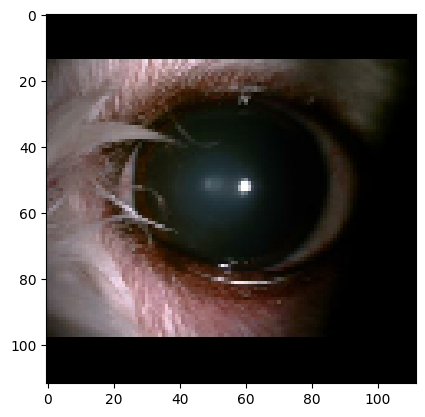

In [49]:
# 샘플 가져오기
image, label = get_one(test_dataset)

# 이미지의 배치 차원 제거하여 단일 이미지로 변환
image = image[0]  # 배치에서 첫 번째 이미지 선택
label = label[0]  # 배치에서 첫 번째 레이블 선택

print("Label:", label)
plt.imshow(image.numpy())
plt.show()

In [50]:
import os
cam_model_path = 'C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/진행/not_pretrained_best_model_again1.h5'
cam_model_predict = tf.keras.models.load_model(cam_model_path)

cam_model_predict.compile(
    loss='categorical_crossentropy', ## 변환해야함 -> sparse_categorical_crossentropy
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=METRICS,
)

In [51]:
import cv2
import numpy as np

# 이미지를 numpy 배열로 변환
image_np = image.numpy()
input_image = cv2.resize(image_np, (112, 112))
input_image = np.expand_dims(input_image, axis=0)
      
# 모델 예측
predictions = cam_model_predict.predict(input_image)
      
# 결과 출력
print(predictions)

predicted_class = np.argmax(predictions)



1/1 [==============================] - 0s 320ms/step
[[3.1993934e-09 1.0000000e+00 1.8082865e-09]]


In [52]:
# def normalize_and_resize_img(input):
#     # Normalizes images: `uint8` -> `float32`
#     image = tf.image.resize(input['image'], [224, 224])
#     input['image'] = tf.cast(image, tf.float32) / 255.
#     return input['image'], input['label']

In [53]:
# import os
# cam_model_path = 'C:/Users/USER/Desktop/Kim_Su_Jin/2024_1/수업/AI융합캡스톤디자인2/DATA/best_model.h5'
# cam_model = tf.keras.models.load_model(cam_model_path)

In [54]:
def generate_cam(model, image, label):
    # item = copy.deepcopy(item)
    # width = item['image'].shape[1]
    # height = item['image'].shape[0]
    
    # img_tensor, class_idx = normalize_and_resize_img(item) # 입력 이미지를 정규화하고 크기를 조정
    
    # 학습한 모델에서 원하는 Layer의 output을 얻기 위해서 모델의 input과 output을 새롭게 정의해줍니다.
    cam_model = tf.keras.models.Model([model.inputs], [model.layers[-3].output, model.output]) 
    # model.layers[-3] => 우리가 필요로 하는 GAP 이전 Convolution layer의 output을 얻을 수 있기 때문
    # 원본 모델에서 마지막에서 세 번째 레이어의 출력과 원본 모델의 출력을 동시에 반환
    conv_outputs, predictions = cam_model(tf.expand_dims(image, 0))
    # 새로 정의한 모델에 이미지를 전달하여 해당 이미지의 특성 맵 (conv_outputs)과 모델의 예측 결과 (predictions)을 얻기
    conv_outputs = conv_outputs[0, :, :, :] # 특성 맵의 형태를 조정
    
    # 모델의 weight activation은 마지막 layer에 있습니다.
    class_weights = model.layers[-1].get_weights()[0] 
    # 모델의 마지막 레이어에서 클래스 가중치를 가져오기

    cam_image = np.zeros(dtype=np.float32, shape=conv_outputs.shape[0:2])
    # CAM을 저장할 빈 이미지를 생성
    # for i, w in enumerate(class_weights[:, label]): # 각 클래스 가중치에 대해 반복
    #     # conv_outputs의 i번째 채널과 i번째 weight를 곱해서 누적하면 활성화된 정도가 나타날 겁니다.
    #     cam_image += w * conv_outputs[:, :, i]
    #     # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성
    for i, w in enumerate(class_weights[label]): # 각 클래스 가중치에 대해 반복
      # conv_outputs의 i번째 채널과 i번째 weight를 곱해서 누적하면 활성화된 정도가 나타날 겁니다.
      cam_image += w * conv_outputs[:, :, i]
      # 특성 맵의 각 채널에 대해 해당 채널의 클래스 가중치와 곱한 값을 누적하여 CAM을 생성

    cam_image /= np.max(cam_image) # activation score를 normalize합니다.
    # CAM을 정규화
    cam_image = cam_image.numpy() # NumPy 배열로 변환
    cam_image = cv2.resize(cam_image, (224, 224)) # 원래 이미지의 크기로 resize합니다.
    return cam_image

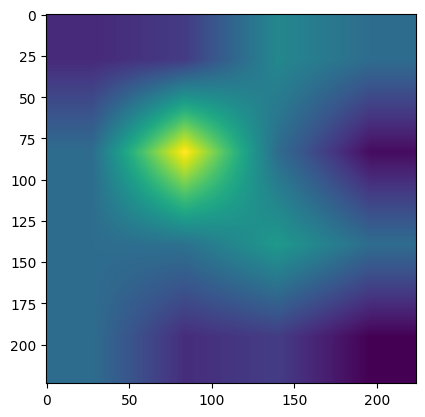

In [55]:
import numpy as np
import cv2

cam_image = generate_cam(model_with_cam, image, label=predicted_class)
plt.imshow(cam_image)
plt.show()

In [56]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt


# # 원본 이미지를 NumPy 배열로 변환하고, 0~1 사이의 값으로 정규화
# original_image = image.numpy()
# if np.max(original_image) > 1:
#     original_image = original_image / 255.0

# # CAM 이미지를 원본 이미지와 동일한 크기로 조정
# cam_image_resized = cv2.resize(cam_image, (original_image.shape[1], original_image.shape[0]))

# # CAM 이미지를 히트맵으로 변환
# cam_image_normalized = (cam_image_resized - np.min(cam_image_resized)) / (np.max(cam_image_resized) - np.min(cam_image_resized))
# cam_heatmap = cv2.applyColorMap(np.uint8(255 * cam_image_normalized), cv2.COLORMAP_JET)

# # 원본 이미지를 RGB 형태로 변환
# original_image_rgb = original_image
# if original_image.shape[2] == 3:  # RGB 이미지인 경우
#     original_image_rgb = cv2.cvtColor(np.float32(original_image), cv2.COLOR_BGR2RGB)

# # 히트맵을 색상 반전
# inverted_heatmap = 255 - cam_heatmap

# # 히트맵을 원본 이미지에 더하고 정규화
# superimposed_img = inverted_heatmap * 0.2 + np.uint8(255 * original_image_rgb)
# superimposed_img = np.clip(superimposed_img, 0, 255)

# # 최종 이미지 출력
# plt.imshow(np.uint8(superimposed_img))
# plt.axis('off')  # 축 숨기기
# plt.show()

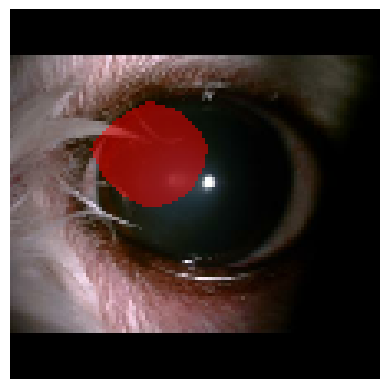

In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 원본 이미지를 NumPy 배열로 변환하고, 0~1 사이의 값으로 정규화
original_image = image.numpy()
if np.max(original_image) > 1:
    original_image = original_image / 255.0

# CAM 이미지를 원본 이미지와 동일한 크기로 조정
cam_image_resized = cv2.resize(cam_image, (original_image.shape[1], original_image.shape[0]))

# CAM 이미지를 히트맵으로 변환
cam_image_normalized = (cam_image_resized - np.min(cam_image_resized)) / (np.max(cam_image_resized) - np.min(cam_image_resized))

# 히트맵의 특정 임계값 이상인 부분만 강조
threshold = 0.6  # 임계값 설정 (0과 1 사이)
mask = cam_image_normalized >= threshold

# 빨간색 히트맵 적용
highlighted_heatmap = np.zeros_like(original_image)
highlighted_heatmap[mask] = [1, 0, 0]  # 빨간색 (RGB)

# 원본 이미지에 히트맵 적용
superimposed_img = original_image.copy()
superimposed_img[mask] = 0.5 * original_image[mask] + 0.5 * highlighted_heatmap[mask]

# 최종 이미지 출력
plt.imshow(np.uint8(superimposed_img * 255))
plt.axis('off')  # 축 숨기기
plt.show()


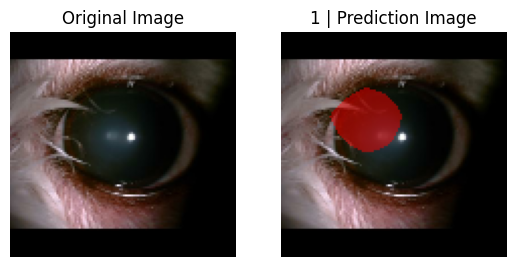

In [62]:
# 왼쪽 subplot: 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# 오른쪽 subplot: 합쳐진 이미지
plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
if predicted_class == 0:
    title = '0'
elif predicted_class == 1:
    title = '1'
elif predicted_class == 2:
    title = '2'
else:
    title = 'Unknown'
plt.title(f'{title} | Prediction Image')
plt.axis('off')

# 출력
plt.show()
